In [1]:
import math

import matplotlib.pyplot as plt
import pandas as pd

from notebooks.analytics.utils import init_analysis, savefig, set_save_folder

In [2]:
labels = {
    "test_acc": "Accuracy of cluster",
    "validation_acc": "Accuracy of trainers",
    "test_loss": "Loss of cluster",
    "validation_loss": "Loss of trainers",
    "round_id": "Rounds"
}


def comparison(exp_0, exp_1, dataset_description, problem_description, model):
    return {
        "exp": (exp_0, exp_1),
        "description": dataset_description,
        "problem": problem_description,
        "model": model
    }

COMPARABLE = [
    comparison(
        "fed_avg_analyse_01",
        "fed_avg_analyse_02",
        "MNIST normal distribution, 1 std, 1 epoch vs 10 epochs",
        "classification",
        "LeNet"
    )
]

COMPARE_INDEX = 0

meta_info = COMPARABLE[COMPARE_INDEX]

EXP_0 = meta_info.get("exp")[0]
EXP_1 = meta_info.get("exp")[1]
(EXP_0, EXP_1)

('fed_avg_analyse_01', 'fed_avg_analyse_02')

In [3]:
fed_avg_0 = init_analysis(EXP_0)
fed_avg_1 = init_analysis(EXP_1)
set_save_folder("comparison")

In [4]:
fed_avg_mean_0 = fed_avg_0.groupby(["round_id"])["test_acc"].mean()
fed_avg_mean_1 = fed_avg_1.groupby(["round_id"])["test_acc"].mean()
(fed_avg_mean_0 - fed_avg_mean_1) / fed_avg_mean_0

round_id
0.0           NaN
1.0      0.048748
2.0      0.018158
3.0      0.033333
4.0     -0.552330
           ...   
98.0    -0.027761
99.0    -0.028477
100.0   -0.028551
101.0   -0.032972
102.0   -0.024485
Name: test_acc, Length: 103, dtype: float64

In [5]:
fed_avg_0.groupby(["round_id"])["test_acc"].min()

round_id
0.0         NaN
1.0      0.0000
2.0      0.0000
3.0      0.0000
4.0      0.0016
          ...  
98.0     0.3312
99.0     0.3440
100.0    0.3600
101.0    0.3192
102.0    0.3376
Name: test_acc, Length: 103, dtype: float64

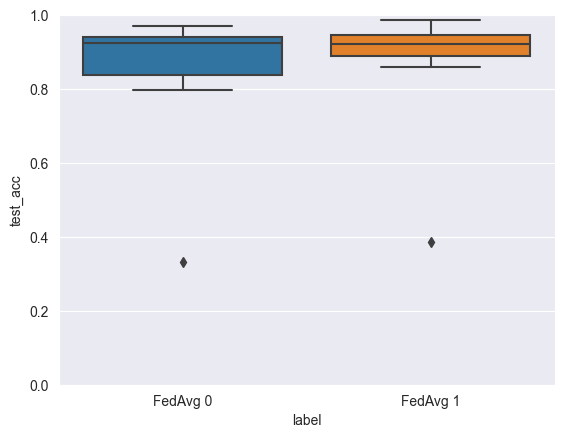

In [6]:
fed_avg_0["label"] = "FedAvg 0"
fed_avg_1["label"] = "FedAvg 1"

import seaborn as sns

merged = pd.concat([fed_avg_0, fed_avg_1])
ax = sns.boxplot(merged.loc[merged.round_id == 98], x="label", y="test_acc")
ax.set(ylim=(0, 1))
plt.show()

In [7]:
fed_avg_0["test_acc"].loc[fed_avg_0.round_id == 101].min()

0.3192000091075897

In [8]:
fed_avg_1["test_acc"].loc[fed_avg_1.round_id == 101].min()

0.41440001130104065

C:\Users\micdu\AppData\Local\Temp\ipykernel_32452\1997380016.py:54: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\micdu\AppData\Local\Temp\ipykernel_32452\1997380016.py:54: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


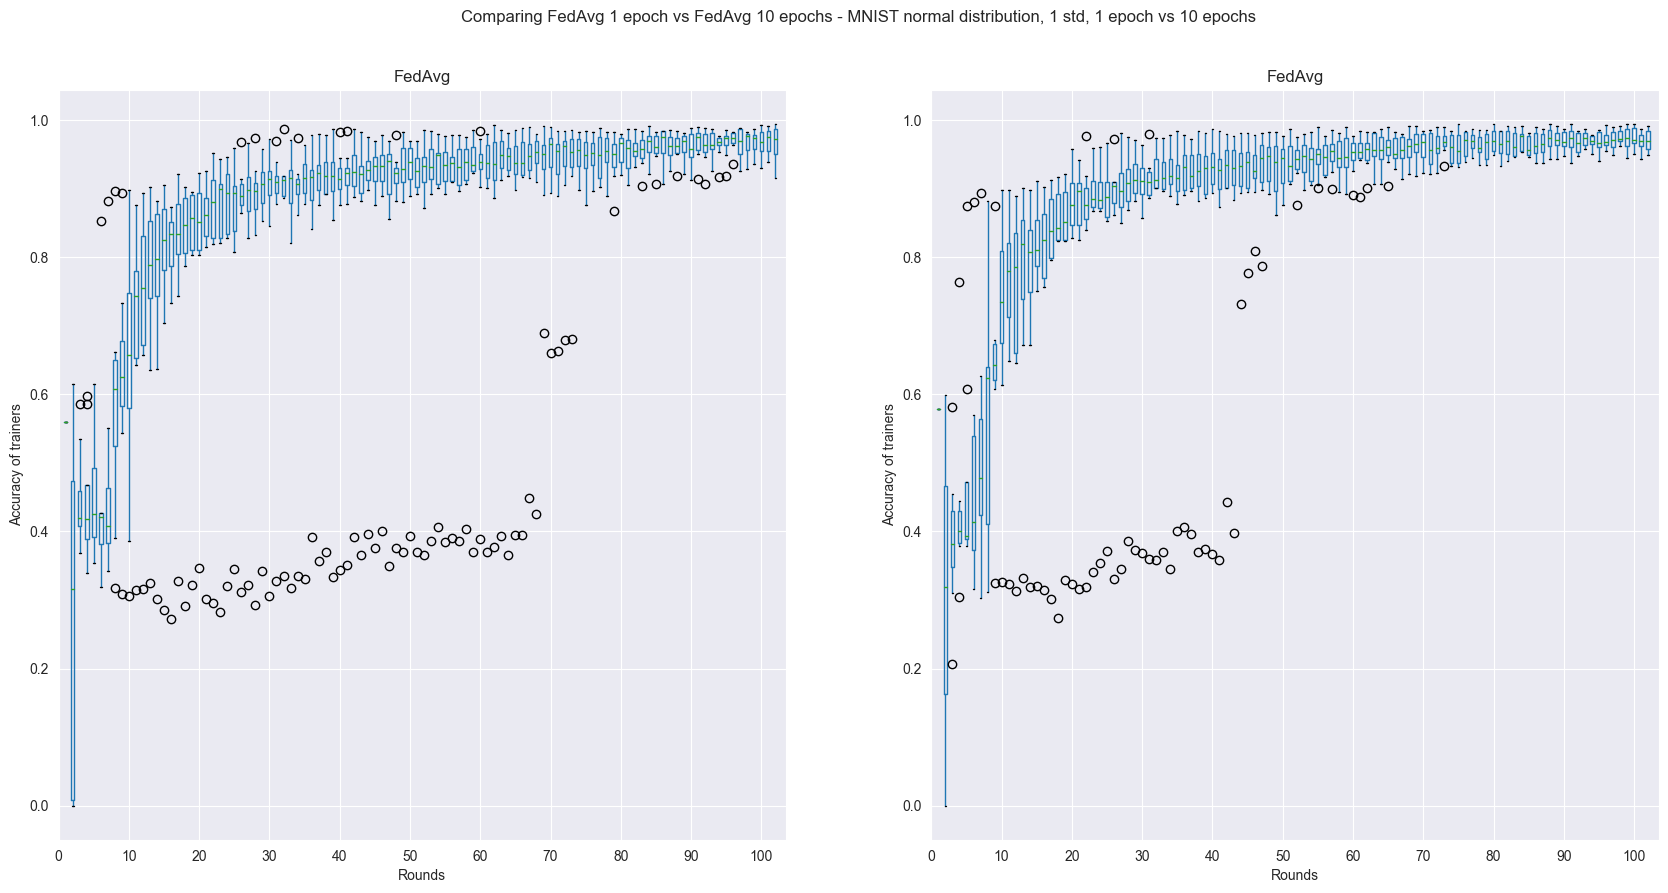

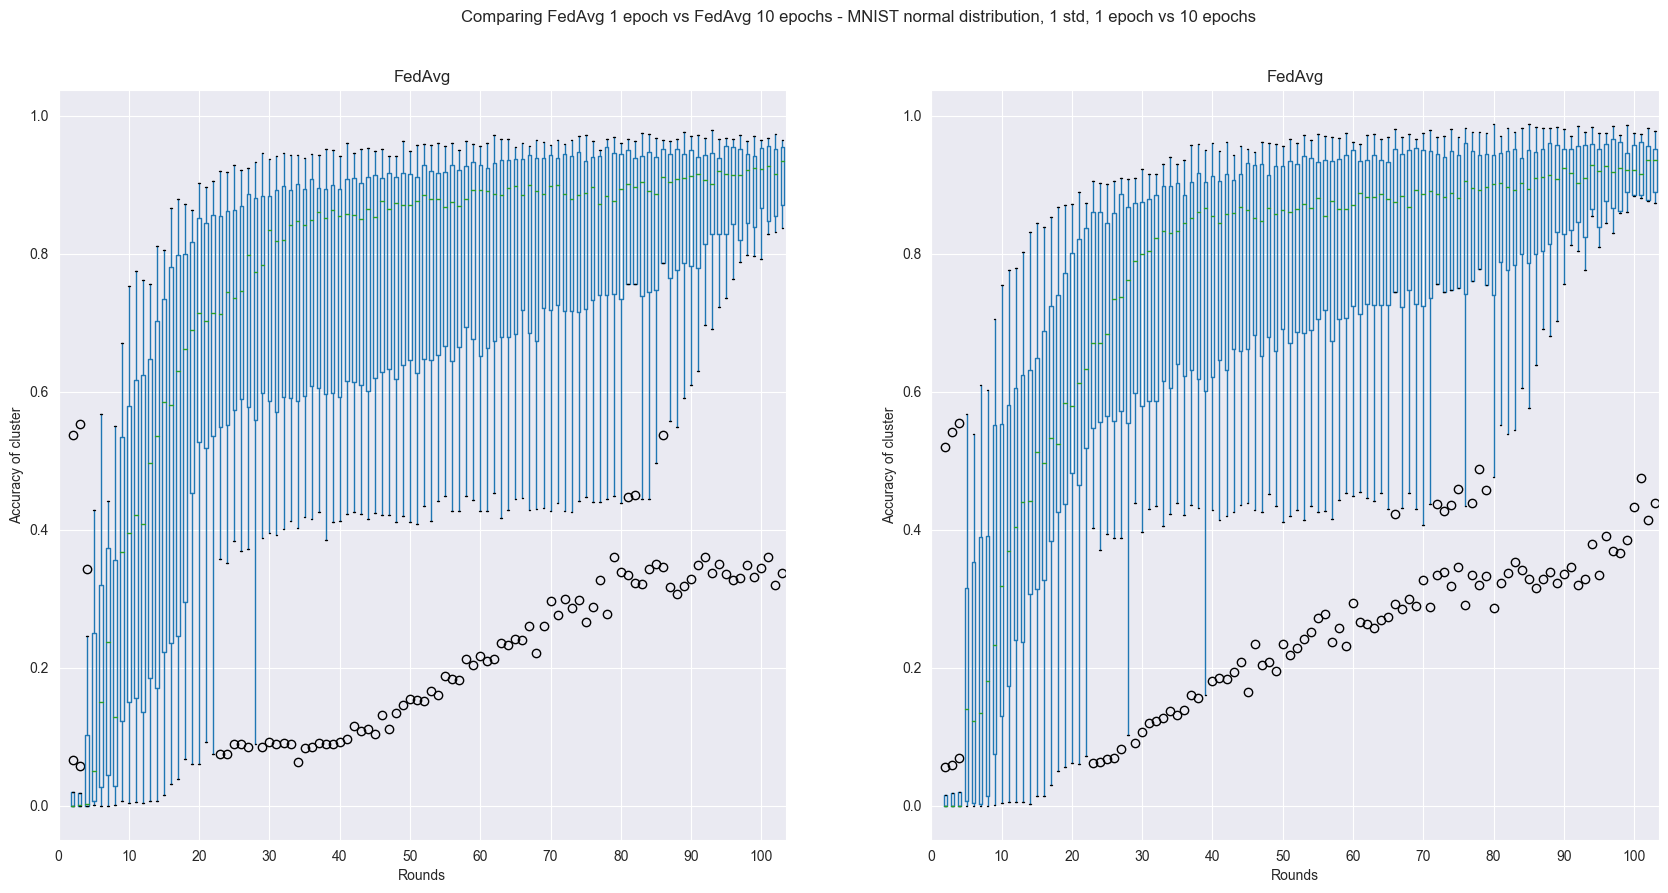

In [11]:
def boxplot_from_df(ax, df, column, xticks, title):
        plot_ax = df.boxplot(column, by="round_id", ax=ax)
        plot_ax.set_xticks(xticks, xticks)
        plot_ax.set_title(title)
        plot_ax.set_ylabel(labels.get(column))
        plot_ax.set_xlabel(labels.get("round_id"))
        return plot_ax

def compare(df_0, df_1, column, dataset=None):
    data_0 = df_0.reset_index()
    data_1 = df_1.reset_index()
    max_round = data_1.round_id.max()
    xticks = range(0, int(max_round), math.floor(max_round/10))
    fig = plt.figure(figsize=(20, 10))
    ax = fig.add_subplot(1, 2, 1)
    title = "FedAvg" if dataset is None else f"FedAvg - {dataset}"
    boxplot_from_df(ax, data_0, column, xticks, title)
    ax = fig.add_subplot(1, 2, 2, sharey=ax)
    title = "FedAvg" if dataset is None else f"MCFL - {dataset}"
    boxplot_from_df(ax, data_1, column, xticks, title)
    return fig

def plot_compare(metric, max=False, min=False):
    def groupby(df, dataset=None):
        if dataset:
            df = df.loc[df.dataset == dataset]
        df = df.groupby(["round_id", "trainer_id"])
        if (not max and not min) or max:
            df = df.max()
        elif min:
            df = df.min()
        return df

    datasets = fed_avg_0.dataset.unique()
    if len(datasets) > 1:
        for dataset in datasets:
            fig = compare(
                groupby(fed_avg_0, dataset),
                groupby(fed_avg_1, dataset),
                metric,
                dataset=dataset
            )
            fig.suptitle(f'Comparing FedAvg vs MCFL - {meta_info.get("description")}')
            savefig(fig, f"{dataset}-{metric}--fedavg")
            fig.show()
    else:
        fig = compare(
            groupby(fed_avg_0),
            groupby(fed_avg_1),
            metric,
        )
        fig.suptitle(f'Comparing FedAvg 1 epoch vs FedAvg 10 epochs - {meta_info.get("description")}')
        savefig(fig, f"{datasets[0]}-{metric}--fedavg")
        fig.show()

def plot_meta():
    if meta_info.get("problem") == "classification":
        plot_compare("validation_acc")
        plot_compare("test_acc")
    else:
        plot_compare("validation_loss", min=True)
        plot_compare("test_loss", min=True)

plot_meta()

In [10]:
import seaborn as sns
df_declust_mean = pd.DataFrame(declust_mean)
df_declust_mean["algo"] = "MCFL"
df_fed_avg_mean = pd.DataFrame(fed_avg_mean)
df_fed_avg_mean["algo"] = "FedAvg"
df_means = pd.concat([df_fed_avg_mean, df_declust_mean])
df_means

NameError: name 'declust_mean' is not defined

In [ ]:
sns.lineplot(df_means.reset_index(),x="round_id", y="test_acc", hue="algo")
plt.ylabel("Précision")
plt.xlabel("Ronde")
plt.title("Précision moyenne des entraîneurs")

plt.show()